<a href="https://colab.research.google.com/github/Seomzo/Project_1-Money_Printer/blob/initial-data-modelling/crypto_price_predictor_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
!pip install yfinance
!pip install prophet


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
import yfinance as yf

%matplotlib inline


# Date Input and Validation

In this section, we will implement a function that prompts the user to enter a date in the `YYYY-MM-DD` format. The function will validate the input and ensure that it is correctly formatted.

If the user enters an invalid date format, they will be given up to three attempts to enter a valid date. If they fail to provide a valid date after three attempts, the program will default to the date `2024-01-01`.

The function will then calculate the number of days from the entered (or defaulted) date to today's date.


In [74]:
from datetime import datetime

start_date='2017-01-01'
today_date = datetime.today().strftime('%Y-%m-%d')

print(f"Today's date in YYYY-MM-DD format: {today_date}")

Today's date in YYYY-MM-DD format: 2024-11-18


In [75]:

# Declare slice_date as a global variable
slice_date = ''

# Function to validate date format and calculate period value
def get_period_value():
    global slice_date  # Use the global variable
    attempts = 0
    max_attempts = 3

    while attempts < max_attempts:
        # Ask user for slice date
        slice_date = input(f"To slice the data to compare real values versus prediction model, please enter a date in YYYY-MM-DD format after {start_date} but before {today_date}: ")

        # Validate the date format
        try:
            # Attempt to parse the date
            parsed_date = datetime.strptime(slice_date, '%Y-%m-%d')
            break  # Exit the loop if the date is valid
        except ValueError:
            attempts += 1
            print("Invalid date format. Please enter the date in YYYY-MM-DD format.")
            if attempts == max_attempts:
                print("Maximum attempts reached. Defaulting to 2024-01-01.")
                slice_date = '2024-01-01'
                parsed_date = datetime.strptime(slice_date, '%Y-%m-%d')

    # Calculate the number of days from the slice date to today
    today = datetime.today()
    period_value = (today - parsed_date).days

    return period_value

In [76]:
crypto_symbol = 'BTC-USD'
crypto_symbol = input("Enter crypto symbol: ").upper()
print(f"Crypto Symbol: {crypto_symbol}")

Crypto Symbol: BTC-USD


In [77]:
period_value = get_period_value()
if period_value is not None:
    print(f"Number of days from {slice_date} to today: {period_value}")

Number of days from 2024-09-10 to today: 69


In [78]:
# Fetch historical data for Bitcoin and Ethereum
btc = yf.download(crypto_symbol, start=start_date, end=today_date)
# eth = yf.download('ETH-USD', start='2015-01-01', end='2023-01-01')

# Display the first few rows of each dataset to inspect the data
print("Bitcoin data:")
display(btc.head())
display(btc.tail())

# print("\nEthereum data:")
# print(eth.head())


[*********************100%***********************]  1 of 1 completed

Bitcoin data:


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2017-01-01 00:00:00+00:00,998.325012,998.325012,1003.080017,958.698975,963.658020,147775008
2017-01-02 00:00:00+00:00,1021.750000,1021.750000,1031.390015,996.702026,998.617004,222184992
2017-01-03 00:00:00+00:00,1043.839966,1043.839966,1044.079956,1021.599976,1021.599976,185168000
2017-01-04 00:00:00+00:00,1154.729980,1154.729980,1159.420044,1044.400024,1044.400024,344945984
2017-01-05 00:00:00+00:00,1013.380005,1013.380005,1191.099976,910.416992,1156.729980,510199008


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2024-11-13 00:00:00+00:00,90584.164062,90584.164062,93434.351562,86256.929688,87929.968750,123559027869
2024-11-14 00:00:00+00:00,87250.429688,87250.429688,91765.218750,86682.812500,90574.882812,87616705248
2024-11-15 00:00:00+00:00,91066.007812,91066.007812,91868.742188,87124.898438,87284.179688,78243109518
2024-11-16 00:00:00+00:00,90558.476562,90558.476562,91763.945312,90094.226562,91064.367188,44333192814
2024-11-17 00:00:00+00:00,89845.851562,89845.851562,91433.039062,88741.664062,90558.460938,46350159305


In [79]:
btc.dropna(inplace=True)
crypto_data = btc.loc[:slice_date, 'Close']
display(crypto_data.head())
display(crypto_data.tail())


Ticker,BTC-USD
Date,
2017-01-01 00:00:00+00:00,998.325012
2017-01-02 00:00:00+00:00,1021.750000
2017-01-03 00:00:00+00:00,1043.839966
2017-01-04 00:00:00+00:00,1154.729980
2017-01-05 00:00:00+00:00,1013.380005


Ticker,BTC-USD
Date,
2024-09-06 00:00:00+00:00,53948.753906
2024-09-07 00:00:00+00:00,54139.687500
2024-09-08 00:00:00+00:00,54841.566406
2024-09-09 00:00:00+00:00,57019.535156
2024-09-10 00:00:00+00:00,57648.710938


<Axes: xlabel='Date'>

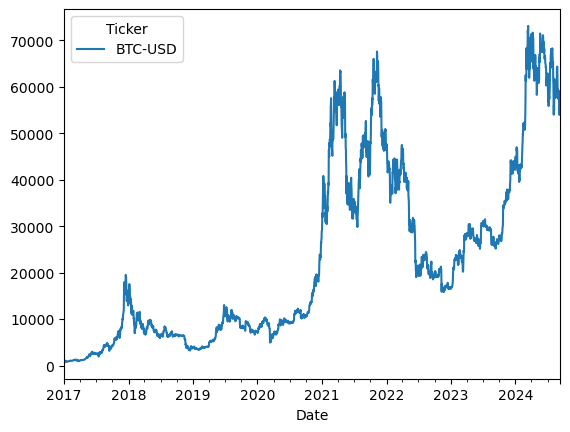

In [80]:
# Comment - Plotting the bitcoin data...
crypto_data.plot()

In [81]:
crypto_data = crypto_data.reset_index()


In [82]:
display(crypto_data.head())
display(crypto_data.tail())

Ticker,Date,BTC-USD
0,2017-01-01 00:00:00+00:00,998.325012
1,2017-01-02 00:00:00+00:00,1021.750000
2,2017-01-03 00:00:00+00:00,1043.839966
3,2017-01-04 00:00:00+00:00,1154.729980
4,2017-01-05 00:00:00+00:00,1013.380005


Ticker,Date,BTC-USD
2805,2024-09-06 00:00:00+00:00,53948.753906
2806,2024-09-07 00:00:00+00:00,54139.687500
2807,2024-09-08 00:00:00+00:00,54841.566406
2808,2024-09-09 00:00:00+00:00,57019.535156
2809,2024-09-10 00:00:00+00:00,57648.710938


In [83]:
crypto_df = crypto_data.rename(columns={'Date':'ds', crypto_symbol: 'y'})

In [84]:
display(crypto_df.head())
display(crypto_df.tail())

Ticker,ds,y
0,2017-01-01 00:00:00+00:00,998.325012
1,2017-01-02 00:00:00+00:00,1021.750000
2,2017-01-03 00:00:00+00:00,1043.839966
3,2017-01-04 00:00:00+00:00,1154.729980
4,2017-01-05 00:00:00+00:00,1013.380005


Ticker,ds,y
2805,2024-09-06 00:00:00+00:00,53948.753906
2806,2024-09-07 00:00:00+00:00,54139.687500
2807,2024-09-08 00:00:00+00:00,54841.566406
2808,2024-09-09 00:00:00+00:00,57019.535156
2809,2024-09-10 00:00:00+00:00,57648.710938


In [85]:
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2810 entries, 0 to 2809
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   ds      2810 non-null   datetime64[ns, UTC]
 1   y       2810 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1)
memory usage: 44.0 KB


In [86]:
crypto_model = Prophet()

In [87]:
crypto_df['ds'] = crypto_df['ds'].dt.tz_localize(None)
crypto_model.fit(crypto_df)

20:12:43 - cmdstanpy - INFO - Chain [1] start processing
20:12:43 - cmdstanpy - INFO - Chain [1] done processing


In [88]:
future_trends = crypto_model.make_future_dataframe(periods=period_value, freq="D")


In [89]:
forecast_trends = crypto_model.predict(future_trends)

# Display the first five rows of the forecast DataFrame
forecast_trends.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01,-2723.515094,-7919.656132,3306.126988,-2723.515094,-2723.515094,339.850288,339.850288,339.850288,-13.766136,-13.766136,-13.766136,353.616424,353.616424,353.616424,0.0,0.0,0.0,-2383.664807
1,2017-01-02,-2688.931951,-8152.810476,3653.873077,-2688.931951,-2688.931951,493.127395,493.127395,493.127395,56.771375,56.771375,56.771375,436.356019,436.356019,436.356019,0.0,0.0,0.0,-2195.804556
2,2017-01-03,-2654.348807,-8265.931128,3602.476452,-2654.348807,-2654.348807,487.403861,487.403861,487.403861,-19.765145,-19.765145,-19.765145,507.169006,507.169006,507.169006,0.0,0.0,0.0,-2166.944946
3,2017-01-04,-2619.765664,-7988.928559,4019.800960,-2619.765664,-2619.765664,614.430466,614.430466,614.430466,49.876593,49.876593,49.876593,564.553873,564.553873,564.553873,0.0,0.0,0.0,-2005.335198
4,2017-01-05,-2585.182521,-8067.889155,4453.566337,-2585.182521,-2585.182521,582.996508,582.996508,582.996508,-24.259264,-24.259264,-24.259264,607.255772,607.255772,607.255772,0.0,0.0,0.0,-2002.186013


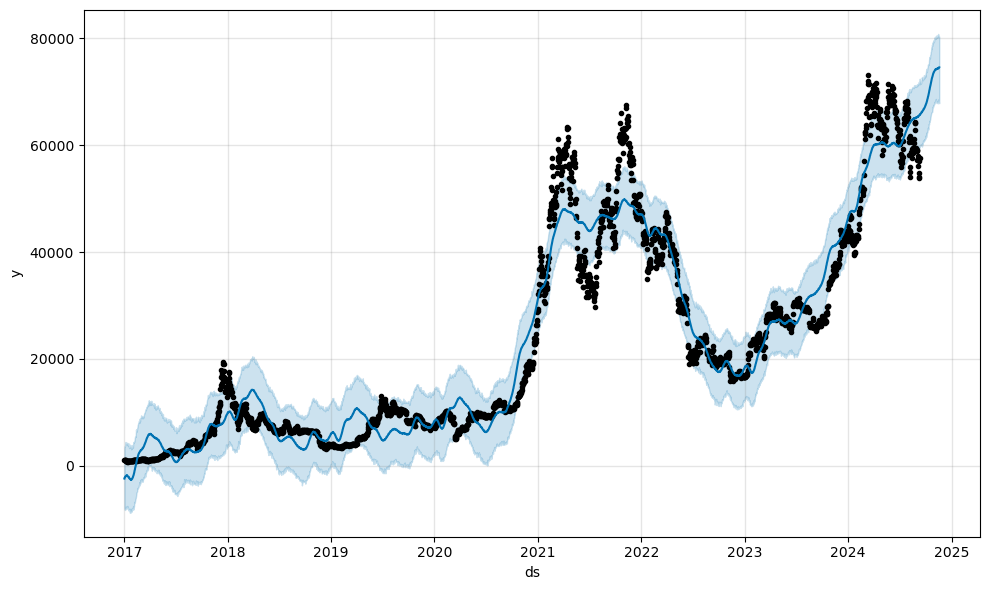

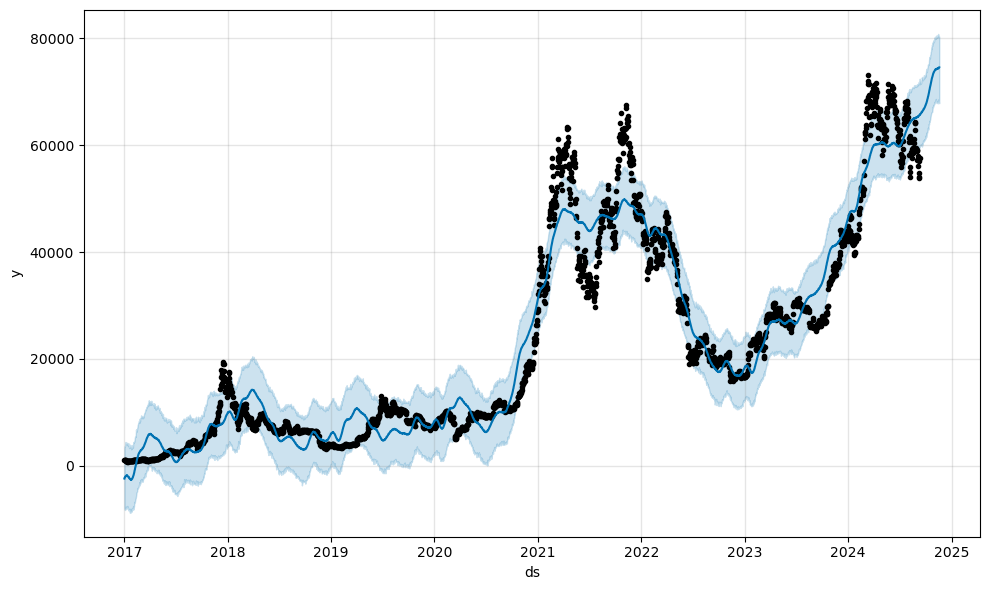

In [90]:
crypto_model.plot(forecast_trends)

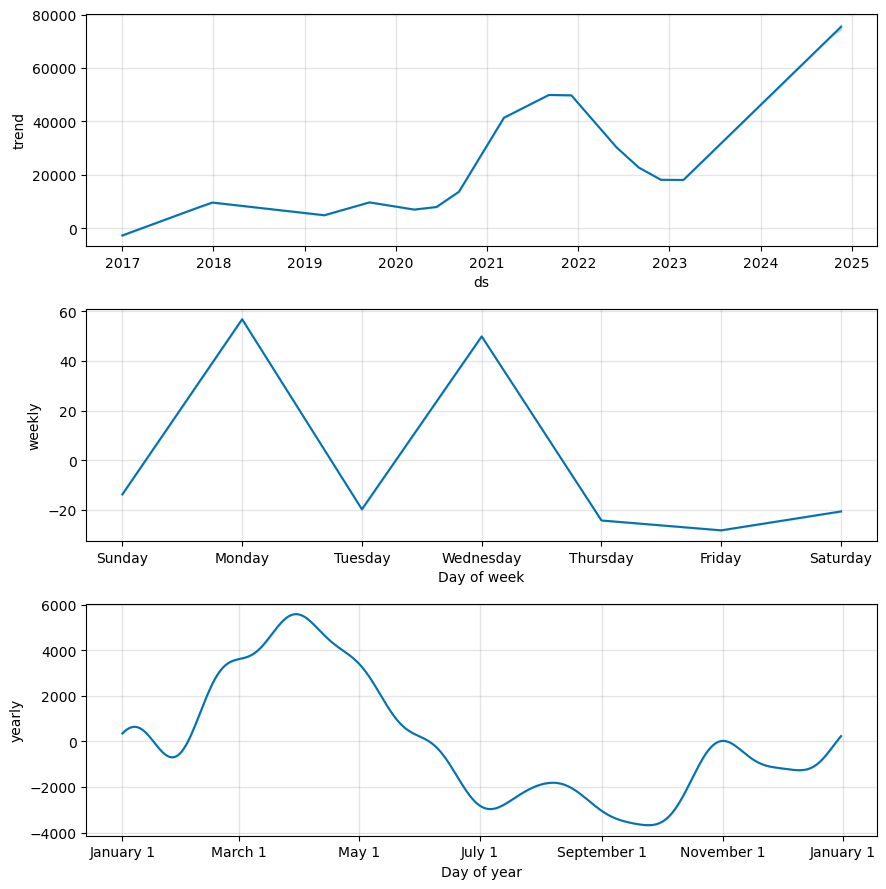

In [91]:
figures = crypto_model.plot_components(forecast_trends)

In [92]:
forecast_trends= forecast_trends[['ds','yhat']]

In [93]:
forecast_trends.set_index('ds', inplace=True)


In [94]:
# reduce the slice_date by period value into another variable

reduced_date = pd.to_datetime(slice_date) - pd.DateOffset(days=period_value)

# compare reduced_date with start_date and see which one is later and keep that date in reduced_date
if reduced_date < pd.to_datetime(start_date):
    reduced_date = pd.to_datetime(start_date)

reduced_date_str = reduced_date.strftime('%Y-%m-%d')
print(f"Reduced Date: {reduced_date_str} and Slice Date: {slice_date}")



Reduced Date: 2024-07-03 and Slice Date: 2024-09-10


In [95]:
forecast_dataframe = forecast_trends.loc[reduced_date:].copy()   # Data from 2024-01-01 to now

# df_after_2024['Date'] = df_after_2024['Date'].dt.tz_localize(None)
# df_after_2024.set_index('Date', inplace=True)
display (forecast_dataframe.head())





,yhat
ds,
2024-07-03,60017.999903
2024-07-04,60007.293537
2024-07-05,60077.737436
2024-07-06,60170.265078
2024-07-07,60271.920803


In [96]:
real_values_for_compare_df = btc.loc[reduced_date_str:, 'Close'].copy()
# real_values_for_compare_df = real_values_for_compare_df.reset_index()
real_values_for_compare_df = real_values_for_compare_df.reset_index()
# real_2024.rename(columns={'Date':'ds', 'Close':'y'}, inplace=True)

real_values_for_compare_df['Date'] = real_values_for_compare_df['Date'].dt.tz_localize(None)

display(real_values_for_compare_df.head())

Ticker,Date,BTC-USD
0,2024-07-03,60173.921875
1,2024-07-04,56977.703125
2,2024-07-05,56662.375000
3,2024-07-06,58303.539062
4,2024-07-07,55849.109375


In [97]:
real_values_for_compare_df = real_values_for_compare_df.set_index('Date')


In [98]:
display(real_values_for_compare_df.head())
display(real_values_for_compare_df.tail())

Ticker,BTC-USD
Date,
2024-07-03,60173.921875
2024-07-04,56977.703125
2024-07-05,56662.375000
2024-07-06,58303.539062
2024-07-07,55849.109375


Ticker,BTC-USD
Date,
2024-11-13,90584.164062
2024-11-14,87250.429688
2024-11-15,91066.007812
2024-11-16,90558.476562
2024-11-17,89845.851562


In [99]:
# merge the 2 dataframes

merged_for_comparsion_df = real_values_for_compare_df.join(forecast_dataframe, how='inner')
display(merged_for_comparsion_df.head())
display(merged_for_comparsion_df.tail())


,BTC-USD,yhat
2024-07-03,60173.921875,60017.999903
2024-07-04,56977.703125,60007.293537
2024-07-05,56662.375000,60077.737436
2024-07-06,58303.539062,60170.265078
2024-07-07,55849.109375,60271.920803


,BTC-USD,yhat
2024-11-13,90584.164062,74434.711541
2024-11-14,87250.429688,74383.982203
2024-11-15,91066.007812,74406.744910
2024-11-16,90558.476562,74445.169184
2024-11-17,89845.851562,74487.470787


In [100]:
merged_for_comparsion_df.rename(columns={crypto_symbol:'Actual Price', 'yhat':'Predicted Price'}, inplace=True)
display(merged_for_comparsion_df)



,Actual Price,Predicted Price
2024-07-03,60173.921875,60017.999903
2024-07-04,56977.703125,60007.293537
2024-07-05,56662.375000,60077.737436
2024-07-06,58303.539062,60170.265078
2024-07-07,55849.109375,60271.920803
...,...,...
2024-11-13,90584.164062,74434.711541
2024-11-14,87250.429688,74383.982203
2024-11-15,91066.007812,74406.744910
2024-11-16,90558.476562,74445.169184


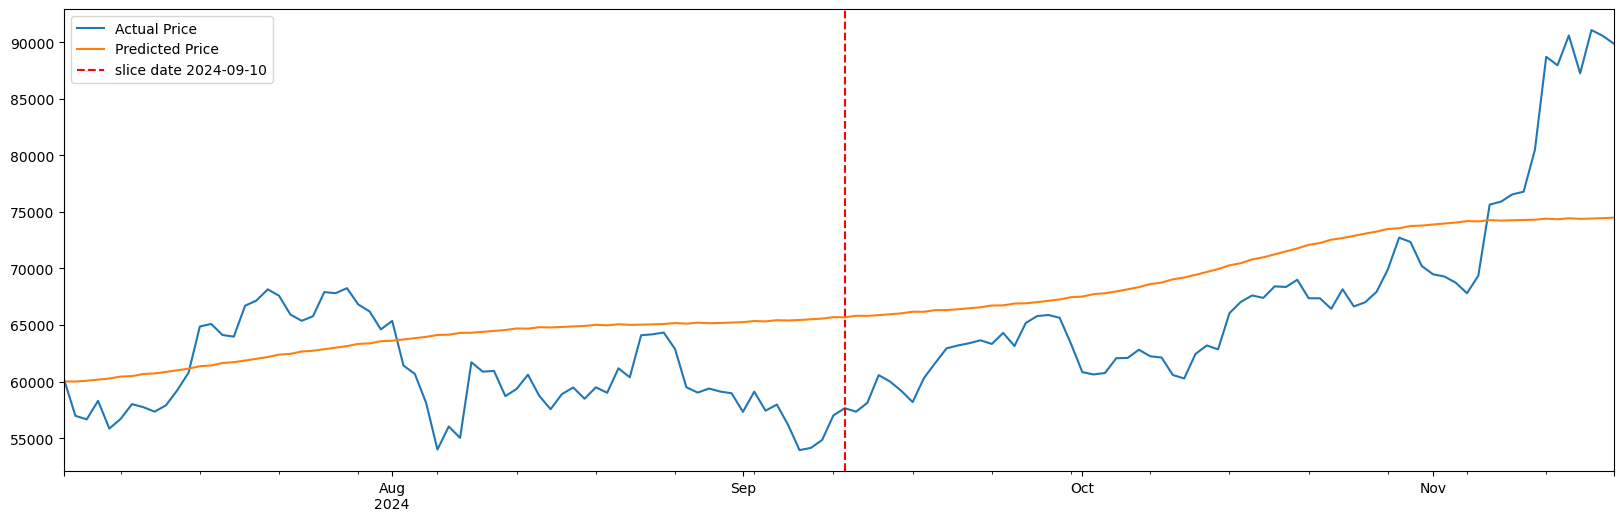

<Axes: >

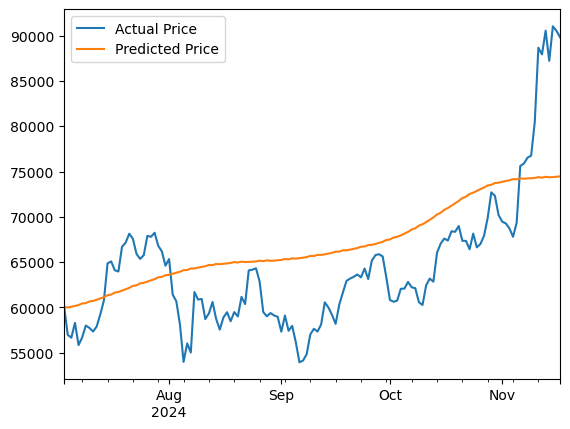

In [101]:
# Plot the DataFrame with a larger figure size
fig, ax = plt.subplots(figsize=(20, 6))  # Change the width and height as needed
merged_for_comparsion_df.plot(ax=ax)
label_date = f"slice date {slice_date}"
plt.axvline(x=pd.to_datetime(slice_date), color='red', linestyle='--', label=label_date)

# Optionally, add a legend
plt.legend()

# Show the plot
plt.show()
merged_for_comparsion_df.plot()


# Now for the fun part... Buy or Sell ?

  - Determine Buy/Sell Signals: After making predictions, you need to establish criteria for when to buy or sell based on the forecasted prices. For example, you could decide to buy if the forecasted price is significantly higher than the last known price and sell if it is lower.

  - Create Buy/Sell Data: Create a new DataFrame that holds the dates and corresponding buy/sell signals.

  - Plot the Forecast and Indicators: Use Matplotlib to plot the forecast and overlay the buy/sell indicators on the graph.


In [102]:
full_crypto_data = btc.loc[:, 'Close'].copy()

full_crypto_data = full_crypto_data.reset_index()

full_crypto_data = full_crypto_data.rename(columns={'Date':'ds', crypto_symbol: 'y'})

full_crypto_data['ds'] = full_crypto_data['ds'].dt.tz_localize(None)

display(full_crypto_data.head())
display(full_crypto_data.tail())

Ticker,ds,y
0,2017-01-01,998.325012
1,2017-01-02,1021.750000
2,2017-01-03,1043.839966
3,2017-01-04,1154.729980
4,2017-01-05,1013.380005


Ticker,ds,y
2873,2024-11-13,90584.164062
2874,2024-11-14,87250.429688
2875,2024-11-15,91066.007812
2876,2024-11-16,90558.476562
2877,2024-11-17,89845.851562


In [103]:
model = Prophet()
model.fit(full_crypto_data)

# Make future predictions
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)


20:12:48 - cmdstanpy - INFO - Chain [1] start processing
20:12:48 - cmdstanpy - INFO - Chain [1] done processing


In [104]:
# Determine buy/sell signals
buy_signals = []
sell_signals = []
#last_price = full_crypto_data['y'].iloc[-1]
last_60_rows = forecast.iloc[-60:]

tomorrow_price = last_60_rows['yhat'].iloc[-30]
month_later_price = last_60_rows['yhat'].iloc[-1]
print(f"{tomorrow_price} -> {month_later_price}")

# prompt percentage change between tomorrow_price and month_later_price
percentage_change = ((month_later_price - tomorrow_price) / tomorrow_price) * 100
print(f"Percentage change: {percentage_change:.2f}%")


75548.48613078323 -> 77414.2331435706
Percentage change: 2.47%


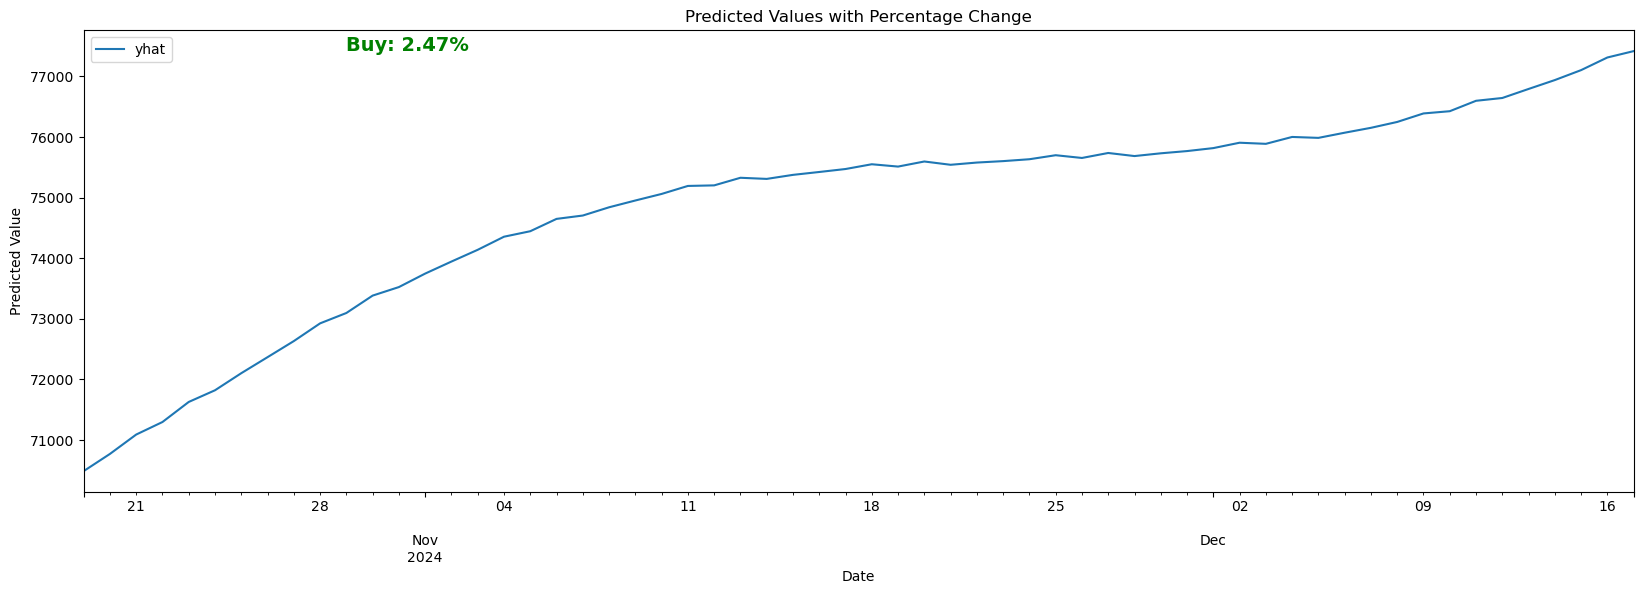

In [105]:
last_60_rows.plot(x='ds', y='yhat', figsize=(20, 6))

# Calculate the percentage change
percentage_change = ((month_later_price - tomorrow_price) / tomorrow_price) * 100

# Add the percentage change value to the plot
if(percentage_change > 0):
    plt.text(last_60_rows['ds'].iloc[-50],
         last_60_rows['yhat'].iloc[-1] ,
         f'Buy: {percentage_change:.2f}%',
         fontsize=14, fontweight='bold', color='green')
else:
    plt.text(last_60_rows['ds'].iloc[-50],
         last_60_rows['yhat'].iloc[-1] ,
         f'Sell: {percentage_change:.2f}%  ',
         fontsize=14, fontweight='bold', color='red')

plt.title('Predicted Values with Percentage Change')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.show()
